# **Music Classification**

Industries and academics analyze aspects of sound to classify songs into genres. We contribute to this endeavor through the classification of 2000 songs using four algorithsm: logistic regression, SVM, Random Forest and CNN. Our logistic regression model has the best performance of 65%. In the future, we intend to augment our redundancy checking method and find more data records.

In [42]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [43]:
import pandas as pd
import numpy as np
import matplotlib

# **Data Collection**

In [44]:
dataOne = pd.read_csv("/content/drive/MyDrive/data.csv") 
dataTwo = pd.read_csv("/content/drive/MyDrive/features_30_sec.csv") 

In [45]:
dataOne.head(5)

,filename,tempo,beats,chroma_stft,rmse,spectral_centroid,spectral_bandwidth,rolloff,zero_crossing_rate,mfcc1,mfcc2,mfcc3,mfcc4,mfcc5,mfcc6,mfcc7,mfcc8,mfcc9,mfcc10,mfcc11,mfcc12,mfcc13,mfcc14,mfcc15,mfcc16,mfcc17,mfcc18,mfcc19,mfcc20,label
0,blues.00081.au,103.359375,50,0.380260,0.248262,2116.942959,1956.611056,4196.107960,0.127272,-26.929785,107.334008,-46.809993,40.932634,-21.463776,24.816275,-18.945571,15.253459,-15.050104,12.262823,-15.234050,14.336612,-13.821769,7.562789,-6.181372,0.330165,-6.829571,0.965922,-7.570825,2.918987,blues
1,blues.00022.au,95.703125,44,0.306451,0.113475,1156.070496,1497.668176,2170.053545,0.058613,-233.860772,136.170239,3.289490,48.931193,8.699106,13.954752,5.359449,0.381334,-13.490265,16.871769,5.145258,-2.250578,3.959198,5.322555,0.812028,-1.107202,-4.556555,-2.436490,3.316913,-0.608485,blues
2,blues.00031.au,151.999081,75,0.253487,0.151571,1331.073970,1973.643437,2900.174130,0.042967,-221.802549,110.843070,18.620984,30.922996,3.291330,22.587447,-20.418303,12.120995,-26.347956,-4.356270,-26.406674,-13.037723,-12.652228,-1.821905,-7.260097,-6.660252,-14.682694,-11.719264,-11.025216,-13.387260,blues
3,blues.00012.au,184.570312,91,0.269320,0.119072,1361.045467,1567.804596,2739.625101,0.069124,-207.208080,132.799175,-15.438986,60.986727,0.725807,12.437828,1.183836,-1.540779,-17.888154,8.358496,-2.452068,-0.613248,0.384877,2.605128,-5.188924,-9.527455,-9.244394,-2.848274,-1.418707,-5.932607,blues
4,blues.00056.au,161.499023,74,0.391059,0.137728,1811.076084,2052.332563,3927.809582,0.075480,-145.434568,102.829023,-12.517677,56.993472,2.271347,26.591402,-4.274803,17.338809,-7.985593,15.235427,-6.934599,7.457218,-10.470444,-2.360483,-6.783623,2.671134,-4.760879,-0.949005,0.024832,-2.005315,blues


In [46]:
dataTwo.head(5)

,filename,length,chroma_stft_mean,chroma_stft_var,rms_mean,rms_var,spectral_centroid_mean,spectral_centroid_var,spectral_bandwidth_mean,spectral_bandwidth_var,rolloff_mean,rolloff_var,zero_crossing_rate_mean,zero_crossing_rate_var,harmony_mean,harmony_var,perceptr_mean,perceptr_var,tempo,mfcc1_mean,mfcc1_var,mfcc2_mean,mfcc2_var,mfcc3_mean,mfcc3_var,mfcc4_mean,mfcc4_var,mfcc5_mean,mfcc5_var,mfcc6_mean,mfcc6_var,mfcc7_mean,mfcc7_var,mfcc8_mean,mfcc8_var,mfcc9_mean,mfcc9_var,mfcc10_mean,mfcc10_var,mfcc11_mean,mfcc11_var,mfcc12_mean,mfcc12_var,mfcc13_mean,mfcc13_var,mfcc14_mean,mfcc14_var,mfcc15_mean,mfcc15_var,mfcc16_mean,mfcc16_var,mfcc17_mean,mfcc17_var,mfcc18_mean,mfcc18_var,mfcc19_mean,mfcc19_var,mfcc20_mean,mfcc20_var,label
0,blues.00000.wav,661794,0.350088,0.088757,0.130228,0.002827,1784.165850,129774.064525,2002.449060,85882.761315,3805.839606,9.015054e+05,0.083045,0.000767,-4.529724e-05,0.008172,0.000008,0.005698,123.046875,-113.570648,2564.207520,121.571793,295.913818,-19.168142,235.574432,42.366421,151.106873,-6.364664,167.934799,18.623499,89.180840,-13.704891,67.660492,15.343150,68.932579,-12.274110,82.204201,10.976572,63.386311,-8.326573,61.773094,8.803792,51.244125,-3.672300,41.217415,5.747995,40.554478,-5.162882,49.775421,0.752740,52.420910,-1.690215,36.524071,-0.408979,41.597103,-2.303523,55.062923,1.221291,46.936035,blues
1,blues.00001.wav,661794,0.340914,0.094980,0.095948,0.002373,1530.176679,375850.073649,2039.036516,213843.755497,3550.522098,2.977893e+06,0.056040,0.001448,1.395807e-04,0.005099,-0.000178,0.003063,67.999589,-207.501694,7764.555176,123.991264,560.259949,8.955127,572.810913,35.877647,264.506104,2.907320,279.932922,21.510466,156.477097,-8.560436,200.849182,23.370686,142.555954,-10.099661,166.108521,11.900497,104.358612,-5.555639,105.173630,5.376327,96.197212,-2.231760,64.914291,4.220140,73.152534,-6.012148,52.422142,0.927998,55.356403,-0.731125,60.314529,0.295073,48.120598,-0.283518,51.106190,0.531217,45.786282,blues
2,blues.00002.wav,661794,0.363637,0.085275,0.175570,0.002746,1552.811865,156467.643368,1747.702312,76254.192257,3042.260232,7.840345e+05,0.076291,0.001007,2.105576e-06,0.016342,-0.000019,0.007458,161.499023,-90.722595,3319.044922,140.446304,508.765045,-29.093889,411.781219,31.684334,144.090317,-13.984504,155.493759,25.764742,74.548401,-13.664875,106.981827,11.639934,106.574875,-11.783643,65.447945,9.718760,67.908859,-13.133803,57.781425,5.791199,64.480209,-8.907628,60.385151,-1.077000,57.711136,-9.229274,36.580986,2.451690,40.598766,-7.729093,47.639427,-1.816407,52.382141,-3.439720,46.639660,-2.231258,30.573025,blues
3,blues.00003.wav,661794,0.404785,0.093999,0.141093,0.006346,1070.106615,184355.942417,1596.412872,166441.494769,2184.745799,1.493194e+06,0.033309,0.000423,4.583644e-07,0.019054,-0.000014,0.002712,63.024009,-199.544205,5507.517090,150.090897,456.505402,5.662678,257.161163,26.859079,158.267303,1.771399,268.034393,14.234031,126.794128,-4.832006,155.912079,9.286494,81.273743,-0.759186,92.114090,8.137607,71.314079,-3.200653,110.236687,6.079319,48.251999,-2.480174,56.799400,-1.079305,62.289902,-2.870789,51.651592,0.780874,44.427753,-3.319597,50.206673,0.636965,37.319130,-0.619121,37.259739,-3.407448,31.949339,blues
4,blues.00004.wav,661794,0.308526,0.087841,0.091529,0.002303,1835.004266,343399.939274,1748.172116,88445.209036,3579.757627,1.572978e+06,0.101461,0.001954,-1.756129e-05,0.004814,-0.000010,0.003094,135.999178,-160.337708,5195.291992,126.219635,853.784729,-35.587811,333.792938,22.148071,193.456100,-32.478600,336.276825,10.852294,134.831573,-23.352329,93.257095,0.498434,124.672127,-11.793437,130.073349,1.207256,99.675575,-13.088418,80.254066,-2.813867,86.430626,-6.933385,89.555443,-7.552725,70.943336,-9.164666,75.793404,-4.520576,86.099236,-5.454034,75.269707,-0.916874,53.613918,-4.404827,62.910812,-11.703234,55.195160,blues


# **Preliminary Feature Selection**

In [47]:
dataOne_selected_features = dataOne[['tempo','spectral_centroid','chroma_stft','spectral_bandwidth']]

dataTwo_selected_features = dataTwo[['tempo','spectral_centroid_mean','chroma_stft_mean','spectral_bandwidth_mean']]

dataTwo_selected_features.columns = ['tempo','spectral_centroid','chroma_stft','spectral_bandwidth']

X = pd.concat([dataOne_selected_features,dataTwo_selected_features],axis=0,keys=["tempo", "spectral_centroid", "chroma_stft",	"spectral_bandwidth",	"spectral_centroid_mean",	"chroma_stft_mean"])

X.drop_duplicates()

y = pd.concat([dataOne['label'],dataTwo['label']],axis=0)


# **Preliminary Logistic Regression Model**

In [48]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42)
clf = LogisticRegression(max_iter=10000)
clf = clf.fit(X_train, y_train) #train the model
class_pred = clf.predict(X_test) #run predictions

recall = recall_score(y_test, class_pred, average='macro')

print(recall)

0.3548350896633302


# **10 Uniformly Distributed Classes**

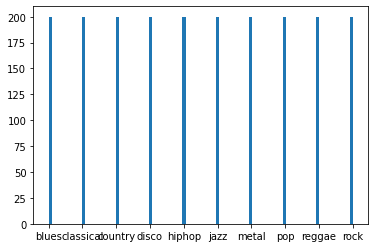

In [49]:
import matplotlib.pyplot as plt

plt.hist(y, bins = 100)
plt.show()

# **Cross-Validation**

Our dataset is small (2000 points). We divide it further into 2 sets for training and testing, which reduces the number of samples we can use for training.

Cross-validation or k-fold CV is a method that trains the model using folds as training data.

The performance measure is the average of the values computed in the loop. 

This approach can be computationally expensive, but does not waste much data and prevents overfitting.

In [50]:
from sklearn.model_selection import ShuffleSplit
from sklearn import metrics
from sklearn.model_selection import cross_val_score

n_samples = 2000
clf = LogisticRegression(max_iter=10000)
cv = ShuffleSplit(n_splits=10, test_size=0.15, random_state=0)
s = cross_val_score(clf, X, y, cv=cv, scoring='f1_macro')

print(s.mean())

0.334554576305565


# **Feature Analysis**

In [51]:
FAdataOne_selected_features = dataOne[['tempo','spectral_centroid','chroma_stft','spectral_bandwidth', 'label']]

FAdataTwo_selected_features = dataTwo[['tempo','spectral_centroid_mean','chroma_stft_mean','spectral_bandwidth_mean', 'label']]

FAdataTwo_selected_features.columns = ['tempo','spectral_centroid','chroma_stft','spectral_bandwidth', 'label']

FAX = pd.concat([FAdataOne_selected_features,FAdataTwo_selected_features],axis=0,keys=["tempo", "spectral_centroid", "chroma_stft",	"spectral_bandwidth",	"spectral_centroid_mean",	"chroma_stft_mean", "label"])

FAX.drop_duplicates()

tempo  spectral_centroid  ...  spectral_bandwidth  label
tempo             0    103.359375        2116.942959  ...         1956.611056  blues
                  1     95.703125        1156.070496  ...         1497.668176  blues
                  2    151.999081        1331.073970  ...         1973.643437  blues
                  3    184.570312        1361.045467  ...         1567.804596  blues
                  4    161.499023        1811.076084  ...         2052.332563  blues
...                           ...                ...  ...                 ...    ...
spectral_centroid 995  103.359375        2008.149458  ...         2106.541053   rock
                  996  117.453835        2006.843354  ...         2068.942009   rock
                  997  129.199219        2077.526598  ...         1927.293153   rock
                  998   73.828125        1398.699344  ...         1818.450280   rock
                  999  123.046875        1609.795082  ...         1797.213044   rock

[1974 rows x 5 columns]

In [52]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
temp_label = FAX['label']

encoded_temp_label = label_encoder.fit_transform(temp_label)
FAX['encoded_label'] = encoded_temp_label

In [53]:
FAX.corr()

,tempo,spectral_centroid,chroma_stft,spectral_bandwidth,encoded_label
tempo,1.000000,-0.020086,0.024561,-0.044228,0.021194
spectral_centroid,-0.020086,1.000000,0.615626,0.904436,0.378394
chroma_stft,0.024561,0.615626,1.000000,0.517596,0.366404
spectral_bandwidth,-0.044228,0.904436,0.517596,1.000000,0.388804
encoded_label,0.021194,0.378394,0.366404,0.388804,1.000000


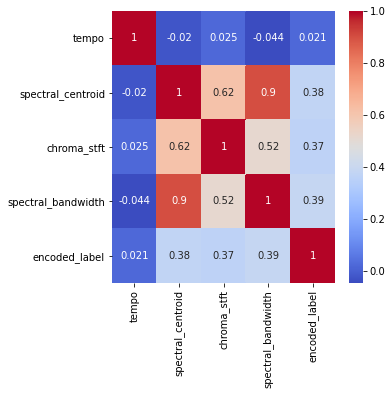

In [54]:
import seaborn
import matplotlib.pyplot as plt
from vega_datasets import data

plt.figure(figsize=(5,5))
seaborn.heatmap(FAX.corr(), annot = True, cmap = "coolwarm")

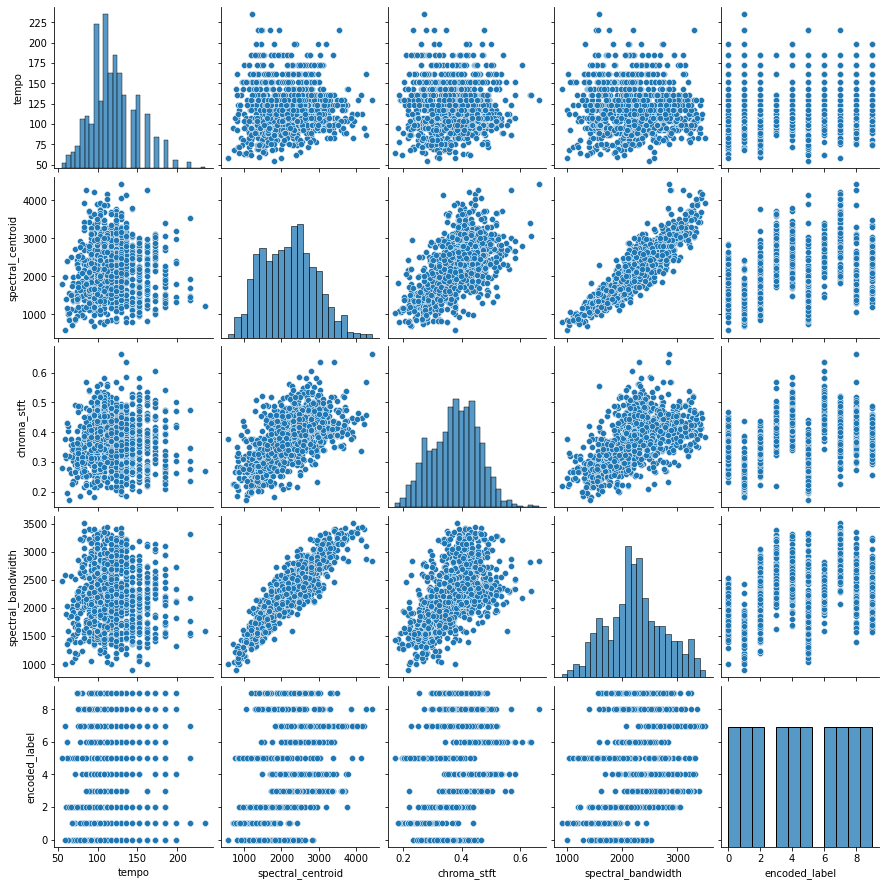

In [55]:
FAX_pairplot = FAX.dropna()
FAX_pairplot.to_excel('/content/drive/MyDrive/FAX_pairplot.xlsx')
seaborn.pairplot(FAX_pairplot, height=2.5)

# **Improved Feature Selection**

In [56]:
dataOne_selected_features = dataOne[['tempo','spectral_centroid','chroma_stft','spectral_bandwidth','rolloff','mfcc1','mfcc2','mfcc3','mfcc4','mfcc5','mfcc6','mfcc7','mfcc8','mfcc9','mfcc10','mfcc11','mfcc12','mfcc13','mfcc14','mfcc15','mfcc16','mfcc17','mfcc18','mfcc19','mfcc20']]

dataTwo_selected_features = dataTwo[['tempo','spectral_centroid_mean','chroma_stft_mean','spectral_bandwidth_mean','rolloff_mean','mfcc1_mean','mfcc2_mean','mfcc3_mean','mfcc4_mean','mfcc5_mean','mfcc6_mean','mfcc7_mean','mfcc8_mean','mfcc9_mean','mfcc10_mean','mfcc11_mean','mfcc12_mean','mfcc13_mean','mfcc14_mean','mfcc15_mean','mfcc16_mean','mfcc17_mean','mfcc18_mean','mfcc19_mean','mfcc20_mean']]

dataTwo_selected_features.columns = ['tempo','spectral_centroid','chroma_stft','spectral_bandwidth','rolloff','mfcc1','mfcc2','mfcc3','mfcc4','mfcc5','mfcc6','mfcc7','mfcc8','mfcc9','mfcc10','mfcc11','mfcc12','mfcc13','mfcc14','mfcc15','mfcc16','mfcc17','mfcc18','mfcc19','mfcc20']

X = pd.concat([dataOne_selected_features,dataTwo_selected_features],axis=0)

X.drop_duplicates()

X.describe()

print(len(X.columns))

25


**Create Labels**

In [57]:
y = pd.concat([dataOne['label'],dataTwo['label']],axis=0)

# **Train, Validate and Test**

## **Logistic Regression**

In [58]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

X_train1, X_test, y_train1, y_test = train_test_split(X, y, test_size=0.15, random_state=42)

X_train, X_validate, y_train, y_validate = train_test_split(X_train1, y_train1, test_size=0.15, random_state=42)

clf = LogisticRegression(max_iter=10000)

scaler = StandardScaler()

scaler.fit(X_train)
X_scaled = scaler.transform(X_train)

clf = clf.fit(X_scaled, y_train) #train the model

X_val_scaled = scaler.transform(X_validate)

class_pred = clf.predict(X_val_scaled) #run predictions

f1_sc = f1_score(y_validate, class_pred, average='macro')

print("F1 Score:   ", f1_sc)

acc = accuracy_score(y_validate, class_pred)

print("Accuracy   ", acc)


F1 Score:    0.6694619096405512
Accuracy    0.6666666666666666


In [59]:
X_test_scaled = scaler.transform(X_test)

class_pred = clf.predict(X_test_scaled) #run predictions

f1_sc = f1_score(y_test, class_pred, average='macro')

print("F1 Score:   ", f1_sc)

acc = accuracy_score(y_test, class_pred)

print("Accuracy   ", acc)

F1 Score:    0.6653073891875335
Accuracy    0.6666666666666666


## **SVM**

In [60]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import f1_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

X_train1, X_test, y_train1, y_test = train_test_split(X, y, test_size=0.15, random_state=42)

X_train, X_validate, y_train, y_validate = train_test_split(X_train1, y_train1, test_size=0.15, random_state=42)

clf = SVC(kernel='linear')

scaler = StandardScaler()

scaler.fit(X_train)

X_scaled = scaler.transform(X_train)

clf = clf.fit(X_scaled, y_train) #train the model

X_val_scaled = scaler.transform(X_validate)

class_pred = clf.predict(X_val_scaled) #run predictions

f1_sc = f1_score(y_validate, class_pred, average='macro')

print("F1 Score:   ", f1_sc)

acc = accuracy_score(y_validate, class_pred)

print("Accuracy   ", acc)

F1 Score:    0.712211685625027
Accuracy    0.7098039215686275


In [61]:
X_test_scaled = scaler.transform(X_test)

class_pred = clf.predict(X_test_scaled) #run predictions

f1_sc = f1_score(y_test, class_pred, average='macro')

print("F1 Score:   ", f1_sc)

acc = accuracy_score(y_test, class_pred)

print("Accuracy   ", acc)

F1 Score:    0.686913026319854
Accuracy    0.6866666666666666


## **Random Forest**

In [62]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

X_train1, X_test, y_train1, y_test = train_test_split(X, y, test_size=0.15, random_state=42)

X_train, X_validate, y_train, y_validate = train_test_split(X_train1, y_train1, test_size=0.15, random_state=42)

clf=RandomForestClassifier(n_estimators=100) #Play with the number of trees to see out the influences the accuracy

scaler = StandardScaler()

scaler.fit(X_train)

X_scaled = scaler.transform(X_train)

clf = clf.fit(X_scaled, y_train) #train the model

X_val_scaled = scaler.transform(X_validate)

class_pred = clf.predict(X_val_scaled) #run predictions

f1_sc = f1_score(y_validate, class_pred, average='macro')

print("F1 Score:   ", f1_sc) #harder to interpret

acc = accuracy_score(y_validate, class_pred) #Use recall as the measure bc genres are uniform. dist + there are so many. Recall gives a more understandable metric and better understanding of model performance.

print("Accuracy   ", acc)

F1 Score:    0.8926556828725175
Accuracy    0.8901960784313725


In [63]:
X_test_scaled = scaler.transform(X_test)

class_pred = clf.predict(X_test_scaled) #run predictions

f1_sc = f1_score(y_test, class_pred, average='macro')

print("F1 Score:   ", f1_sc)

acc = accuracy_score(y_test, class_pred)

print("Accuracy   ", acc)

F1 Score:    0.8985813371198008
Accuracy    0.8966666666666666


# **Feature Analysis**

In [64]:
FA2dataOne_selected_features = dataOne[['tempo','spectral_centroid','chroma_stft','spectral_bandwidth','rolloff','mfcc1','mfcc2','mfcc3','mfcc4','mfcc5','mfcc6','mfcc7','mfcc8','mfcc9','mfcc10','mfcc11','mfcc12','mfcc13','mfcc14','mfcc15','mfcc16','mfcc17','mfcc18','mfcc19','mfcc20', "label"]]

FA2dataTwo_selected_features = dataTwo[['tempo','spectral_centroid_mean','chroma_stft_mean','spectral_bandwidth_mean','rolloff_mean','mfcc1_mean','mfcc2_mean','mfcc3_mean','mfcc4_mean','mfcc5_mean','mfcc6_mean','mfcc7_mean','mfcc8_mean','mfcc9_mean','mfcc10_mean','mfcc11_mean','mfcc12_mean','mfcc13_mean','mfcc14_mean','mfcc15_mean','mfcc16_mean','mfcc17_mean','mfcc18_mean','mfcc19_mean','mfcc20_mean', "label"]]

FA2dataTwo_selected_features.columns = ['tempo','spectral_centroid','chroma_stft','spectral_bandwidth','rolloff','mfcc1','mfcc2','mfcc3','mfcc4','mfcc5','mfcc6','mfcc7','mfcc8','mfcc9','mfcc10','mfcc11','mfcc12','mfcc13','mfcc14','mfcc15','mfcc16','mfcc17','mfcc18','mfcc19','mfcc20', "label"]

FA2X = pd.concat([FA2dataOne_selected_features,FA2dataTwo_selected_features],axis=0)

FA2X.drop_duplicates()

,tempo,spectral_centroid,chroma_stft,spectral_bandwidth,rolloff,mfcc1,mfcc2,mfcc3,mfcc4,mfcc5,mfcc6,mfcc7,mfcc8,mfcc9,mfcc10,mfcc11,mfcc12,mfcc13,mfcc14,mfcc15,mfcc16,mfcc17,mfcc18,mfcc19,mfcc20,label
0,103.359375,2116.942959,0.380260,1956.611056,4196.107960,-26.929785,107.334008,-46.809993,40.932634,-21.463776,24.816275,-18.945571,15.253459,-15.050104,12.262823,-15.234050,14.336612,-13.821769,7.562789,-6.181372,0.330165,-6.829571,0.965922,-7.570825,2.918987,blues
1,95.703125,1156.070496,0.306451,1497.668176,2170.053545,-233.860772,136.170239,3.289490,48.931193,8.699106,13.954752,5.359449,0.381334,-13.490265,16.871769,5.145258,-2.250578,3.959198,5.322555,0.812028,-1.107202,-4.556555,-2.436490,3.316913,-0.608485,blues
2,151.999081,1331.073970,0.253487,1973.643437,2900.174130,-221.802549,110.843070,18.620984,30.922996,3.291330,22.587447,-20.418303,12.120995,-26.347956,-4.356270,-26.406674,-13.037723,-12.652228,-1.821905,-7.260097,-6.660252,-14.682694,-11.719264,-11.025216,-13.387260,blues
3,184.570312,1361.045467,0.269320,1567.804596,2739.625101,-207.208080,132.799175,-15.438986,60.986727,0.725807,12.437828,1.183836,-1.540779,-17.888154,8.358496,-2.452068,-0.613248,0.384877,2.605128,-5.188924,-9.527455,-9.244394,-2.848274,-1.418707,-5.932607,blues
4,161.499023,1811.076084,0.391059,2052.332563,3927.809582,-145.434568,102.829023,-12.517677,56.993472,2.271347,26.591402,-4.274803,17.338809,-7.985593,15.235427,-6.934599,7.457218,-10.470444,-2.360483,-6.783623,2.671134,-4.760879,-0.949005,0.024832,-2.005315,blues
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,103.359375,2008.149458,0.352063,2106.541053,4253.557033,-153.640961,109.864647,-23.065695,59.050125,-7.475873,19.726795,-16.484838,18.066439,-22.202005,15.409106,-12.372051,12.348828,-12.297895,5.777902,-10.273881,1.789867,-13.289984,2.484145,-6.713265,-1.193787,rock
996,117.453835,2006.843354,0.398687,2068.942009,4149.338328,-142.392029,116.189629,-32.147167,49.117840,-8.373376,22.882061,-18.315985,20.098146,-22.093319,10.798820,-12.979385,14.080058,-16.392994,4.154395,-4.364872,3.739020,-10.848309,1.881229,-7.461491,-2.795338,rock
997,129.199219,2077.526598,0.432142,1927.293153,4031.405321,-124.952271,115.177155,-47.975151,52.814674,-13.484810,21.742352,-12.407492,20.122042,-18.363756,10.120382,-16.037611,10.474113,-17.947060,1.212127,-11.519417,1.838090,-12.845291,3.440978,-12.588070,-2.106337,rock
998,73.828125,1398.699344,0.362485,1818.450280,3015.631004,-225.007751,123.646751,-9.724174,56.605164,10.436500,20.622280,-10.253696,15.561657,-8.227290,12.800152,-9.001975,7.682845,-10.070732,-0.256386,-5.275370,-2.812176,-4.416050,1.556207,-5.041897,-3.590644,rock


In [65]:
temp_label2 = FA2X['label']

encoded_temp_label2 = label_encoder.fit_transform(temp_label2)
FA2X['encoded_label'] = encoded_temp_label2

In [66]:
FA2X.corr()

,tempo,spectral_centroid,chroma_stft,spectral_bandwidth,rolloff,mfcc1,mfcc2,mfcc3,mfcc4,mfcc5,mfcc6,mfcc7,mfcc8,mfcc9,mfcc10,mfcc11,mfcc12,mfcc13,mfcc14,mfcc15,mfcc16,mfcc17,mfcc18,mfcc19,mfcc20,encoded_label
tempo,1.000000,-0.020086,0.024561,-0.044228,-0.026046,0.003207,0.013205,-0.097651,0.028904,-0.085473,0.042706,-0.083890,0.035068,-0.074217,0.031593,-0.081559,-0.030487,-0.044882,0.008984,-0.052273,0.024761,-0.072112,-0.010775,-0.060636,-0.030532,0.021194
spectral_centroid,-0.020086,1.000000,0.615626,0.904436,0.979635,0.720918,-0.940176,0.188000,-0.136824,0.069082,0.017584,0.215690,0.134377,0.288834,0.192873,0.152719,0.175035,0.051284,0.170800,0.022388,0.153710,0.027438,0.228162,0.027840,0.269600,0.378394
chroma_stft,0.024561,0.615626,1.000000,0.517596,0.598016,0.659422,-0.598604,-0.054392,0.264186,-0.010100,0.416915,0.067522,0.509803,0.115880,0.489305,0.072724,0.516655,-0.081585,0.417126,-0.143414,0.332377,-0.163462,0.269863,-0.089708,0.281870,0.366404
spectral_bandwidth,-0.044228,0.904436,0.517596,1.000000,0.956192,0.648487,-0.896656,0.494053,-0.279613,0.303015,-0.066070,0.391049,0.027797,0.409603,0.063454,0.289520,0.038147,0.205285,0.054814,0.127641,0.027134,0.104962,0.114749,0.098184,0.187859,0.388804
rolloff,-0.026046,0.979635,0.598016,0.956192,1.000000,0.721844,-0.934304,0.295568,-0.156100,0.124244,0.034636,0.249642,0.137663,0.311107,0.184972,0.173885,0.162907,0.081754,0.158664,0.032149,0.132385,0.039659,0.205116,0.048184,0.256607,0.385225
mfcc1,0.003207,0.720918,0.659422,0.648487,0.721844,1.000000,-0.639062,-0.101008,0.108667,-0.114674,0.235611,0.007216,0.331642,0.053460,0.340323,-0.027058,0.331625,-0.171627,0.252222,-0.200744,0.185695,-0.208455,0.199759,-0.121613,0.195202,0.340068
mfcc2,0.013205,-0.940176,-0.598604,-0.896656,-0.934304,-0.639062,1.000000,-0.268807,0.049682,-0.152345,-0.092626,-0.264026,-0.192153,-0.322628,-0.216364,-0.203884,-0.177134,-0.110600,-0.195922,-0.064426,-0.160347,-0.051059,-0.202745,-0.027894,-0.238699,-0.354841
mfcc3,-0.097651,0.188000,-0.054392,0.494053,0.295568,-0.101008,-0.268807,1.000000,-0.409646,0.601344,-0.255824,0.519129,-0.317161,0.438644,-0.347282,0.427363,-0.338721,0.425050,-0.262981,0.298592,-0.298035,0.250424,-0.190890,0.229982,-0.077111,0.062805
mfcc4,0.028904,-0.136824,0.264186,-0.279613,-0.156100,0.108667,0.049682,-0.409646,1.000000,-0.449061,0.673563,-0.432672,0.638323,-0.451075,0.549076,-0.380155,0.582580,-0.459178,0.449804,-0.441929,0.408269,-0.405902,0.151377,-0.278407,0.097788,-0.014066
mfcc5,-0.085473,0.069082,-0.010100,0.303015,0.124244,-0.114674,-0.152345,0.601344,-0.449061,1.000000,-0.434716,0.766344,-0.421814,0.647427,-0.446325,0.640938,-0.460224,0.631596,-0.375368,0.532986,-0.340966,0.359209,-0.304482,0.335711,-0.135346,0.067938


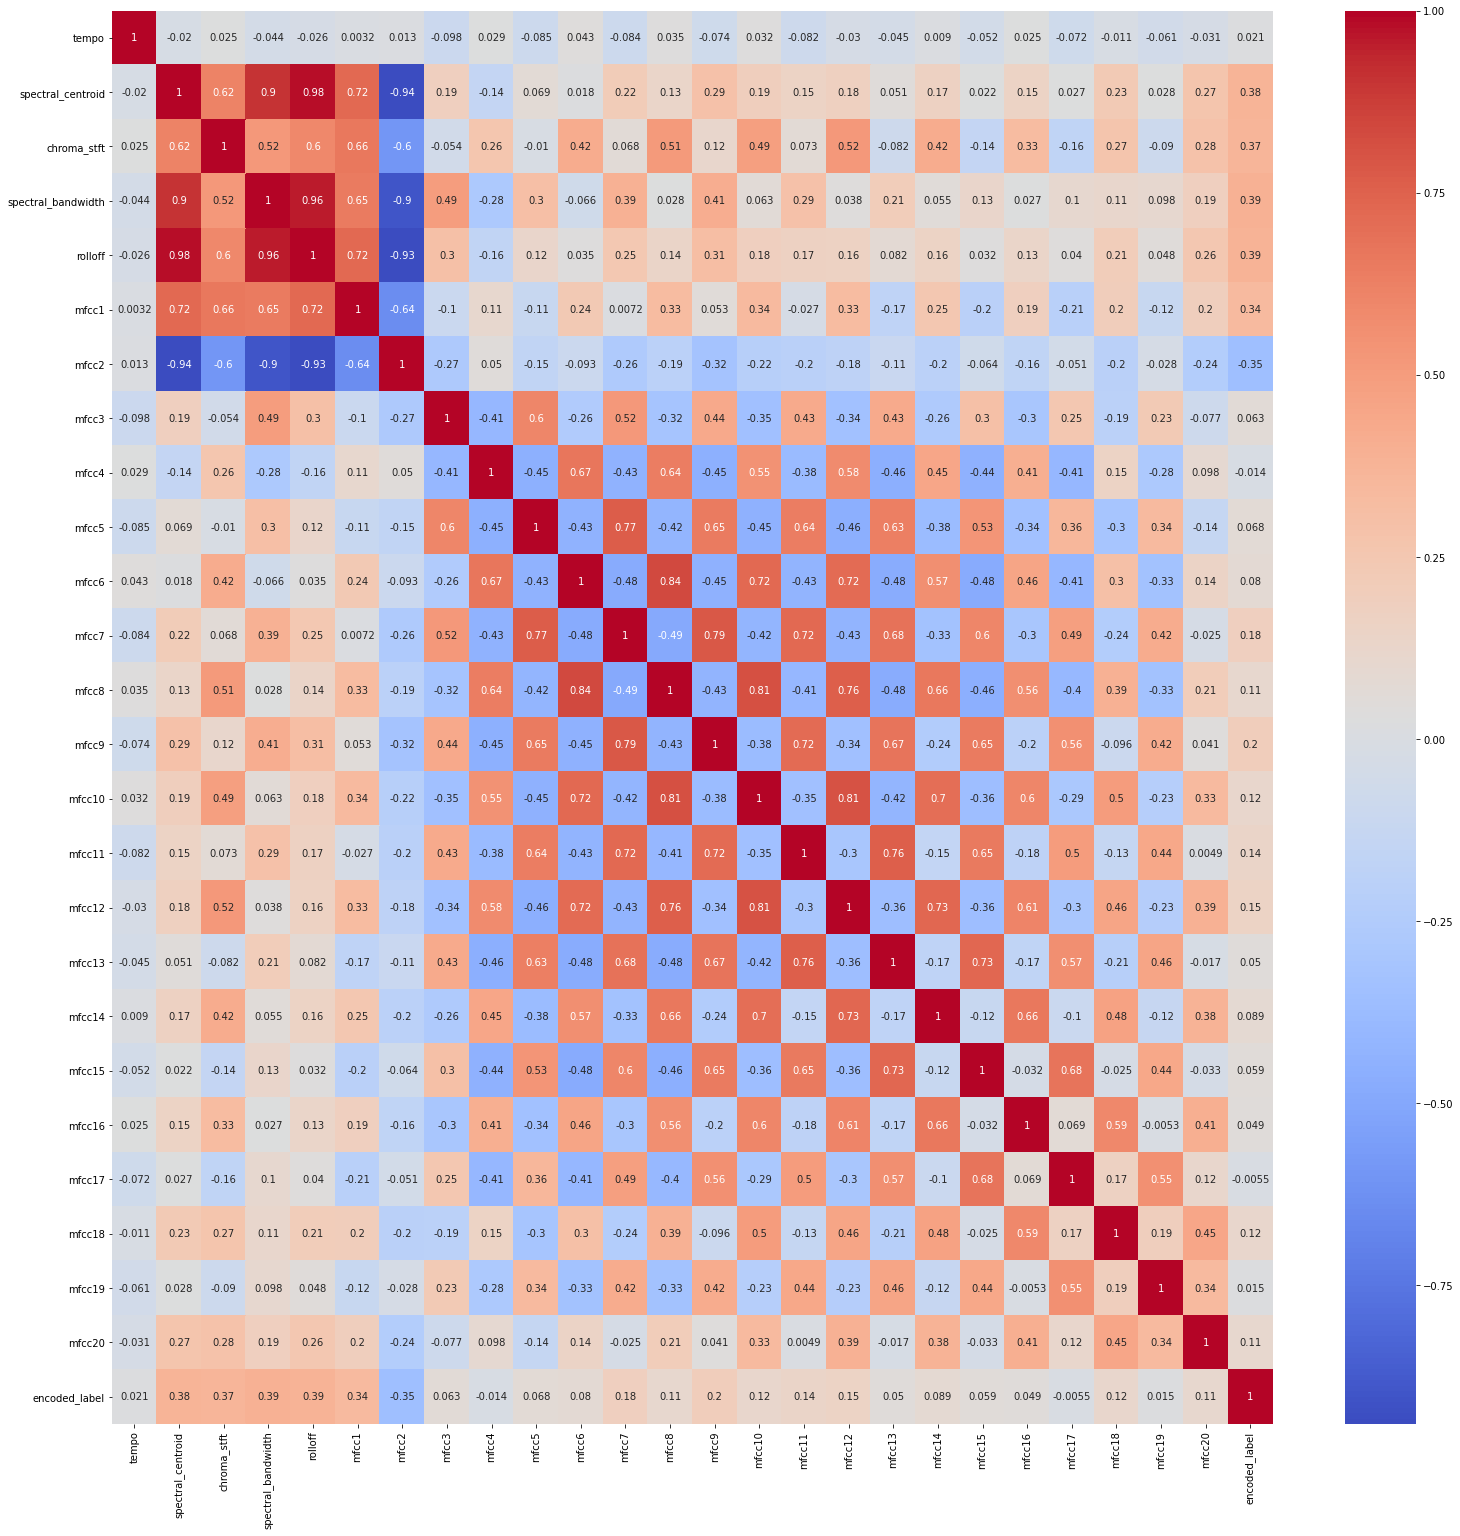

In [67]:
plt.figure(figsize=(26,26))
seaborn.heatmap(FA2X.corr(), annot = True, cmap = "coolwarm")
plt.savefig("corr.png")

In [68]:
#FA2X_pairplot = FA2X.dropna()
#FA2X_pairplot.to_excel('/content/drive/MyDrive/FA2X_pairplot.xlsx')
#seaborn.pairplot(FA2X_pairplot, height=1.5)